In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


$$y = 5x_1 + 2x_2^2 + 9x_3 + 6$$

In [5]:
def generate_data(n_samples = 200):

    np.random.seed(42)

    x1 = np.random.randn(n_samples)
    x2 = np.random.randn(n_samples)
    x3 = np.random.randn(n_samples)

    y = 5 * x1 + 2 * x2 ** 2 + 9 * x3 + 6
    y += 0.5 * np.random.randn(n_samples)

    X = np.column_stack((x1, x2 ** 2, x3))

    return X, y


In [6]:
X, y = generate_data()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [8]:
def ridge_regression_sklearn(X, y, alpha = 0.1):

    scaler = StandardScaler()   # 标准化特征
    X_scaled = scaler.fit_transform(X)

    X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]

    model = Ridge(alpha = alpha, fit_intercept = False)
    model.fit(X_b, y)

    return model, scaler

In [9]:
model, scaler = ridge_regression_sklearn(X_train, y_train, alpha = 0.1)


In [10]:
def evaluate_model(model, X, y, scaler):

    X_scaled = scaler.transform(X)
    X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]

    y_pred = model.predict(X_b)
    
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return mse, r2, y_pred
    

In [11]:
mse_train, r2_train, y_pred_train = evaluate_model(model, X_train, y_train, scaler)
mse_test, r2_test, y_pred_test = evaluate_model(model, X_test, y_test, scaler)


In [12]:
coef = model.coef_[1:]
intercept = model.coef_[0]


将系数转换回原始尺度

In [13]:
coef_original = coef / scaler.scale_
intercept_original = intercept - np.sum(coef_original * scaler.mean_ / scaler.scale_)


In [22]:
def plot_results(y_true, y_pred):

    plt.figure(figsize = (12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha = 0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--", linewidth = 2)

    plt.title("Actual vs Predicted Values", fontsize = 15, fontweight = "bold", fontfamily = "sans-serif")
    plt.xlabel("Actual Values", fontsize = 10, fontweight = "bold", fontfamily = "sans-serif")
    plt.ylabel("Predicted Values", fontsize = 10, fontweight = "bold", fontfamily = "sans-serif")

    plt.grid(True)

    plt.subplot(1, 2, 2)
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, alpha = 0.6)
    plt.axhline(y = 0, color = "r", linewidth = 2, linestyle = "--")
    plt.title("Residual plot", fontsize = 15, fontweight = "bold", fontfamily = "sans-serif")
    plt.xlabel("Predicted Values", fontsize = 10, fontweight = "bold", fontfamily = "sans-serif")
    plt.ylabel("Residuals", fontsize = 10, fontweight = "bold", fontfamily = "sans-serif")

    plt.grid(True)

    plt.suptitle("Test set performance", fontsize = 20, fontweight = "bold", fontfamily = "sans-serif")

    plt.tight_layout()
    plt.show()


Test set performance:



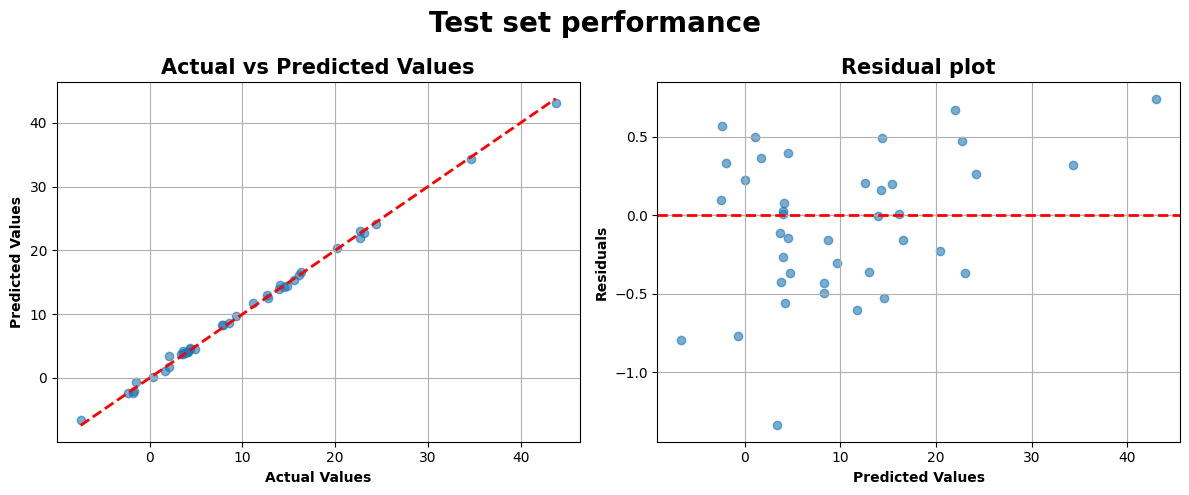

In [23]:
print("Test set performance:\n")
plot_results(y_test, y_pred_test)

In [26]:
def plot_results(intercept_original, coef_original, mse_test, r2_test):

    print(f"Model's final parameters: (Original Scale)\n")

    print(f"Intercept: {intercept_original:.4f}")
    print(f"x1 coefficient: {coef_original[0]:.4f}")
    print(f"x2^2 coefficient: {coef_original[1]:.4f}")
    print(f"x3 coefficient: {coef_original[2]:.4f}\n")

    print("-" * 50, "\n")

    print(f"Model's performance metrics: Test set (Original Scale)\n")

    print(f"Mean Squared Error (MSE): {mse_test:.4f}")
    print(f"R-squared (R2): {r2_test:.4f}\n")

    print("-" * 50, "\n")

    print(f"Model's fitted function: {coef_original[0]:.4f} * x1 + {coef_original[1]:.4f} * x2^2 + {coef_original[2]:.4f} * x3 + {intercept_original:.4f}")


In [27]:
plot_results(intercept_original, coef_original, mse_test, r2_test)


Model's final parameters: (Original Scale)

Intercept: 6.5009
x1 coefficient: 5.0355
x2^2 coefficient: 1.9963
x3 coefficient: 9.0396

-------------------------------------------------- 

Model's performance metrics: Test set (Original Scale)

Mean Squared Error (MSE): 0.2015
R-squared (R2): 0.9981

-------------------------------------------------- 

Model's fitted function: 5.0355 * x1 + 1.9963 * x2^2 + 9.0396 * x3 + 6.5009
